In [100]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import collections
import community.community_louvain as community_louvain

In [75]:
# !pip install community
# !pip install networkx
# !pip install python-louvain

In [2]:
data = pd.read_csv("./Data/student_all.csv")

In [3]:
data.rename(columns={"sex":"gender"}, inplace=True)

In [4]:
data.drop(columns='Unnamed: 0', inplace=True)

In [5]:
data['alc'] = data['Dalc'] + data['Walc']

In [6]:
indexes = [i for i in range(data.shape[0])]
indexes = pd.DataFrame({"Names":indexes})
indexes
data = pd.concat([data, indexes], axis=1)

In [7]:
data["guardian"][data["guardian"] == "father"] = "parent"
data["guardian"][data["guardian"] == "mother"] = "parent"

C:\Users\Marin\AppData\Local\Temp/ipykernel_808/3828257580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["guardian"][data["guardian"] == "father"] = "parent"
C:\Users\Marin\AppData\Local\Temp/ipykernel_808/3828257580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["guardian"][data["guardian"] == "mother"] = "parent"


In [8]:
data['absences'][(data["absences"] > 0) & (data["absences"] < 11)] = 1

C:\Users\Marin\AppData\Local\Temp/ipykernel_808/2866260647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['absences'][(data["absences"] > 0) & (data["absences"] < 11)] = 1


In [9]:
data["guardian"].unique()

array(['parent', 'other'], dtype=object)

In [10]:
data.head(10)

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,course,alc,Names
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,1,5,6,6,mat,2,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,1,5,5,6,mat,2,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,1,7,8,10,mat,5,2
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,1,15,14,15,mat,2,3
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,1,6,10,10,mat,3,4
5,GP,M,16,U,LE3,T,4,3,services,other,...,1,2,5,1,15,15,15,mat,3,5
6,GP,M,16,U,LE3,T,2,2,other,other,...,1,1,3,0,12,12,11,mat,2,6
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,1,1,1,6,5,6,mat,2,7
8,GP,M,15,U,LE3,A,3,2,services,other,...,1,1,1,0,16,18,19,mat,2,8
9,GP,M,15,U,GT3,T,3,4,other,other,...,1,1,5,0,14,15,15,mat,2,9


In [11]:
data.shape

(1044, 36)

In [12]:
data.columns

Index(['school', 'gender', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'course', 'alc',
       'Names'],
      dtype='object')

In [13]:
# To install a package in a Jupyter Notebook
# !pip install *package name*

In [14]:
data_vec = data.to_numpy()

In [15]:
data_vec

array([['GP', 'F', 18, ..., 'mat', 2, 0],
       ['GP', 'F', 17, ..., 'mat', 2, 1],
       ['GP', 'F', 15, ..., 'mat', 5, 2],
       ...,
       ['MS', 'F', 18, ..., 'por', 2, 1041],
       ['MS', 'M', 17, ..., 'por', 7, 1042],
       ['MS', 'M', 18, ..., 'por', 7, 1043]], dtype=object)

In [16]:
data_vec[1, :]

array(['GP', 'F', 17, 'U', 'GT3', 'T', 1, 1, 'at_home', 'other', 'course',
       'parent', 1, 2, 0, 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes',
       'no', 5, 3, 3, 1, 1, 3, 1, 5, 5, 6, 'mat', 2, 1], dtype=object)

In [17]:
data_vec[1, 1] == data_vec[1, 1]

True

In [18]:
data_vec.shape

(1044, 36)

In [19]:
G = nx.Graph()

In [20]:
# TODO: Define a threshold
# lim -> 0 similare
# lim -> infinite different
list_of_scores = []
for vec in range(1, data_vec.shape[0]):
    for vecs in range(data_vec.shape[0]):
        list_difference = []
        for col in range(data_vec.shape[1]):
            list_difference.append(data_vec[vec - 1, col-1] != data_vec[vecs, col-1])
            diff_score = sum(list_difference)
            list_of_scores.append(diff_score)
        if diff_score < 9:
            G.add_edge(data_vec[vec, -1], data_vec[vecs, -1])
        else: 
            pass

In [23]:
print(f"Len: {len(list_of_scores)}")
print(f"Mean: {round(np.mean(list_of_scores), 4)}")
print(f"Median: {np.median(list_of_scores)}")
print(f"Max: {np.max(list_of_scores)}")
print(f"Min: {np.min(list_of_scores)}")

Len: 39200112
Mean: 9.8967
Median: 9.0
Max: 34
Min: 0


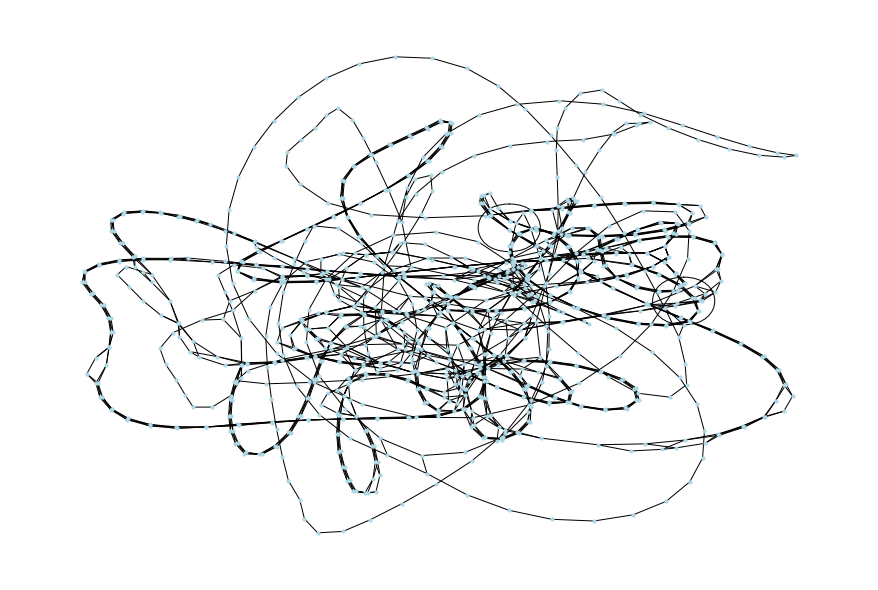

In [22]:
plt.figure(figsize=(12, 8))
graph_options = {
    'node_color': 'lightblue',
    'node_size' : 10,
    "edge_color": 'black'
}

nx.draw(G, **graph_options)
plt.show()

In [29]:
weighting = {'school': 1,
             'gender':1.5,
             'age':0.5,
             'address':1,
             'famsize':0.5,
             'Pstatus':1.5,
             'Medu':1,
             'Fedu':1,
             'Mjob':1.5,
             'Fjob':1.5,
             'reason':0.5,
             'guardian':1,
             'traveltime':0.5,
             'studytime':1,
             'failures':1,
             'schoolsup':1,
             'famsup':1,
             'paid':0.5,
             'activities':1,
             'nursery':0.5,
             'higher':0.5,
             'internet':1.5,
             'romantic':1,
             'famrel':1.5,
             'freetime':0.5,
             'goout':1,
             'Dalc':1.5,
             'Walc':1.5,
             'health':1,
             'absences':1,
             'G1':0.5,
             'G2':0.5,
             'G3':0.5,
             'course':0.5,
             'alc':1.5,
             'Names':0
            }


In [60]:
columns_name = list(data.columns)
list_of_scores = []
for vec in range(1, data_vec.shape[0]):
    for vecs in range(data_vec.shape[0]):
        list_difference = []
        score = 0
        for col in range(data_vec.shape[1]):
            if data_vec[vec - 1, col-1] != data_vec[vecs, col-1]:
                score += weighting[columns_name[col]]
                list_of_scores.append(score)
        
        if score < 10.5:
            G.add_edge(data_vec[vec, -1], data_vec[vecs, -1])
        else: 
            pass
        
# Quid pondérer les arrêtes des graphes
# pour chaque communauté des reprendre les communautés

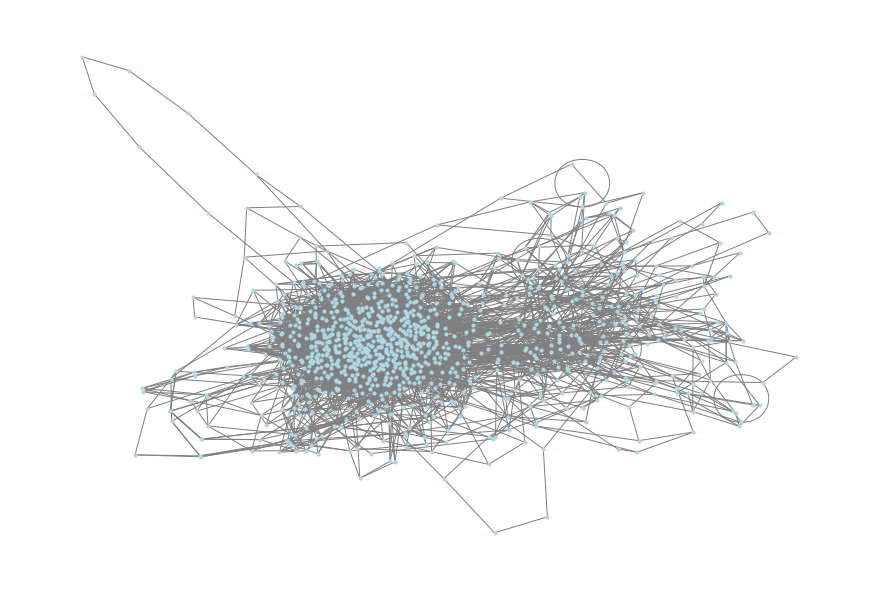

In [57]:
plt.figure(figsize=(12, 8))
graph_options = {
    'node_color': 'lightblue',
    'node_size' : 10,
    "edge_color": 'grey'
}

nx.draw(G, **graph_options, label=True)
plt.show()

In [52]:
print(f"Len: {len(list_of_scores)}")
print(f"Mean: {round(np.mean(list_of_scores), 4)}")
print(f"Median: {np.median(list_of_scores)}")
print(f"Max: {np.max(list_of_scores)}")
print(f"Min: {np.min(list_of_scores)}")

Len: 22089875
Mean: 10.7377
Median: 10.5
Max: 32.5
Min: 1.0


In [76]:
partition = community_louvain.best_partition(G)
len(partition)

1044

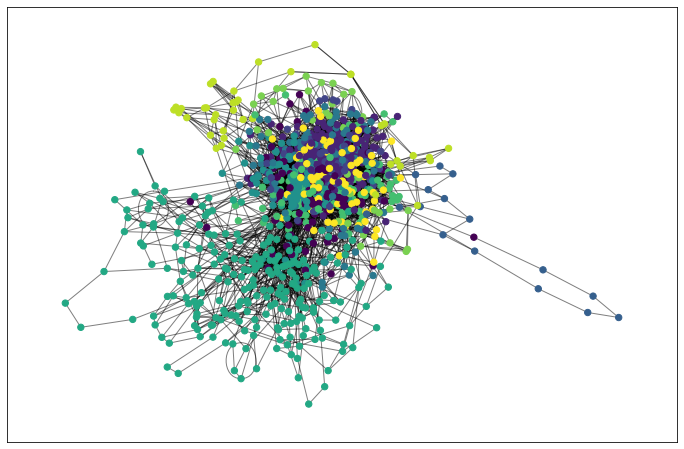

In [83]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [90]:
set(partition.values())
# Donc il y a 10 communautés ?

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [102]:
partition_sort = collections.OrderedDict(sorted(partition.items()))
partition_sort

OrderedDict([(0, 1),
             (1, 0),
             (2, 0),
             (3, 2),
             (4, 2),
             (5, 2),
             (6, 7),
             (7, 1),
             (8, 1),
             (9, 1),
             (10, 1),
             (11, 1),
             (12, 1),
             (13, 1),
             (14, 4),
             (15, 1),
             (16, 1),
             (17, 1),
             (18, 1),
             (19, 1),
             (20, 1),
             (21, 1),
             (22, 1),
             (23, 1),
             (24, 1),
             (25, 1),
             (26, 5),
             (27, 5),
             (28, 1),
             (29, 1),
             (30, 1),
             (31, 1),
             (32, 1),
             (33, 1),
             (34, 1),
             (35, 1),
             (36, 1),
             (37, 1),
             (38, 1),
             (39, 1),
             (40, 0),
             (41, 0),
             (42, 1),
             (43, 1),
             (44, 8),
             (45, 8)